In [87]:
import librosa as lb
import librosa.display
import librosa.feature
import librosa.util
import librosa.effects

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import wave 
import soundfile as sf
import pyaudio


In [432]:
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\kick\kick_samples\kick_0001.wav"
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\hat\hat_samples\hat_0008.wav"
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\snare\snare_samples\snare_0001.wav"
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\clap\clap_samples\clap_0001.wav"
file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\snare\snare_samples\snare_0120.wav"




In [433]:
def play_wave(wave, wave_info):
    # initialize PyAudio
    p = pyaudio.PyAudio()

    # open a stream
    stream = p.open(format=pyaudio.paFloat32,
                    channels=wave_info.channels,
                    rate=wave_info.samplerate,
                    output=True)

    # play audio
    stream.write(wave.tobytes())

    # stop stream and terminate PyAudio
    stream.stop_stream()
    stream.close()
    p.terminate()

In [434]:
wave_info = sf.info(file_path)
print(f"Channels: {wave_info.channels}")
print(f"Sample rate: {wave_info.samplerate} Hz")
print(f"Duration: {wave_info.duration} seconds")

Channels: 1
Sample rate: 44100 Hz
Duration: 1.385328798185941 seconds


In [435]:
lb_wave, _ = lb.load(file_path, sr=wave_info.samplerate)

In [436]:
duration = lb.get_duration(y=lb_wave, sr=wave_info.samplerate)
print(f"Librosa duration: {duration} seconds")

Librosa duration: 1.385328798185941 seconds


### MFCC

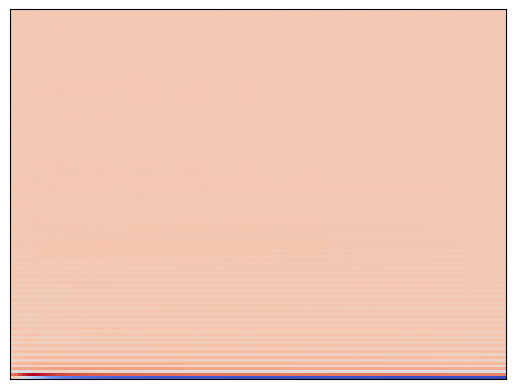

In [485]:
mfcc_features = lb.feature.mfcc(y=lb_wave, sr=wave_info.samplerate, n_mfcc=128, n_fft=2048, hop_length=512, lifter=0, dct_type=3)
lb.display.specshow(mfcc_features, sr=wave_info.samplerate)

In [480]:
#from mfcc features to audio
wave_from_mfcc = lb.feature.inverse.mfcc_to_audio(mfcc_features)


In [481]:
play_wave(lb_wave, wave_info)

In [482]:
play_wave(wave_from_mfcc, wave_info)

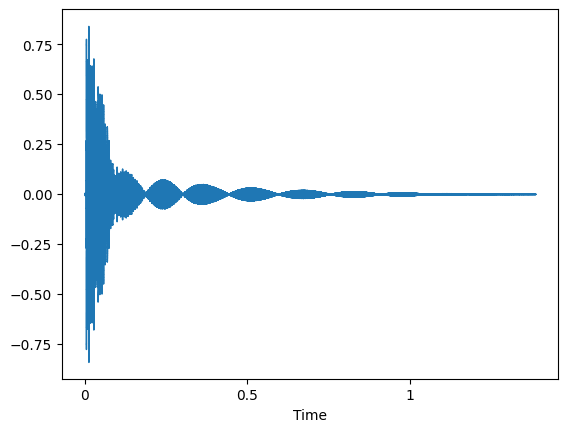

In [483]:
lb.display.waveshow(lb_wave, sr=wave_info.samplerate)


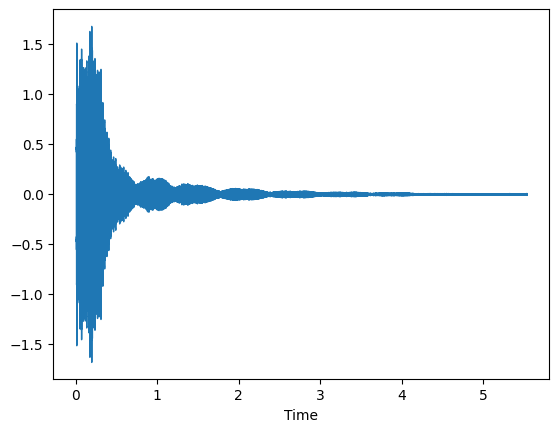

In [484]:
lb.display.waveshow(wave_from_mfcc, sr=wave_info.samplerate)

### MEL-spectogram

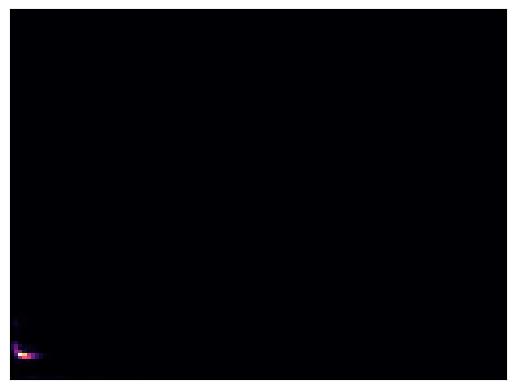

In [443]:
mel_features = lb.feature.melspectrogram(y=lb_wave, 
                                         sr=wave_info.samplerate, 
                                         n_fft=2048, 
                                         n_mels=128, 
                                         hop_length=512, 
                                         power = 2, 
                                         htk=True, 
                                        #  fmax=1024
                                         )

lb.display.specshow(mel_features, sr=wave_info.samplerate)

In [444]:
wave_from_mel = lb.feature.inverse.mel_to_audio(mel_features,
                                                sr=wave_info.samplerate,
                                                # fmax=1024,
                                                )

In [445]:
play_wave(lb_wave, wave_info)

In [446]:
play_wave(wave_from_mel, wave_info)

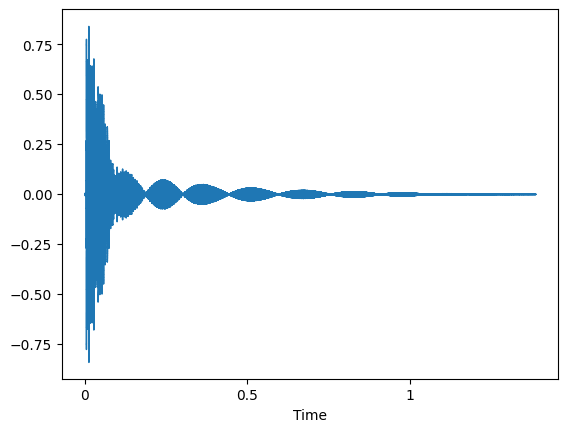

In [447]:
librosa.display.waveshow(lb_wave, sr=wave_info.samplerate)

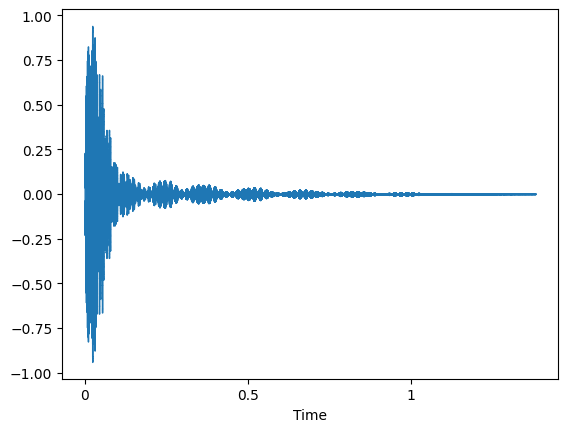

In [448]:
librosa.display.waveshow(wave_from_mel, sr=wave_info.samplerate)

### STFT

C:\Users\llama\AppData\Local\Temp\ipykernel_19500\3063567129.py:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lb.display.specshow(stft_features, sr=wave_info.samplerate)


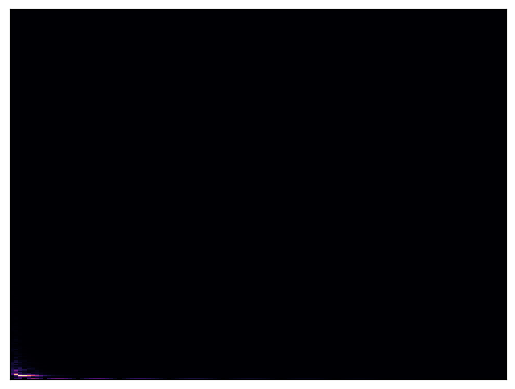

In [449]:
stft_features = lb.stft(y=lb_wave, n_fft=1024, hop_length=512)
# stft_features[25:, :] = 0
lb.display.specshow(stft_features, sr=wave_info.samplerate)

In [450]:
wave_from_stft = lb.istft(stft_features, hop_length=512)

In [451]:
play_wave(lb_wave, wave_info)

In [452]:
play_wave(wave_from_stft, wave_info)

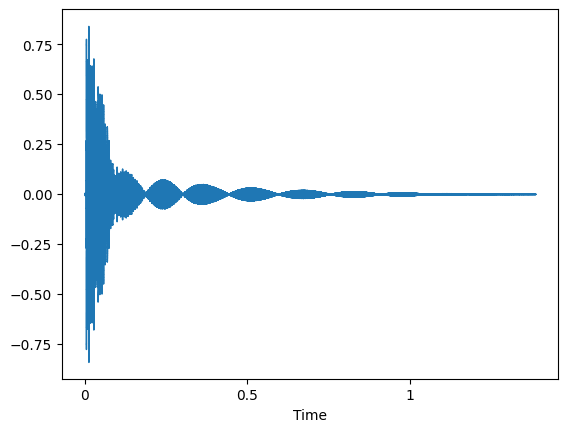

In [453]:
lb.display.waveshow(lb_wave, sr=wave_info.samplerate)

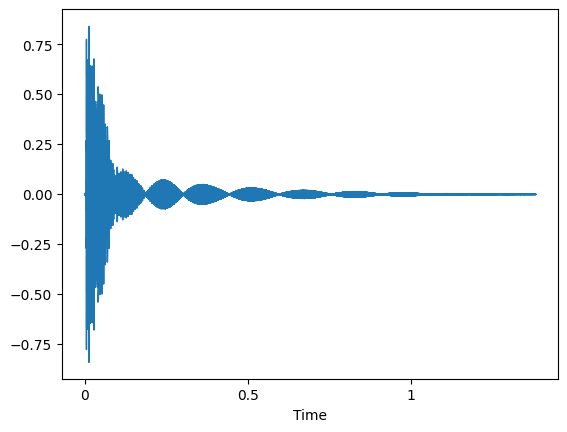

In [454]:
lb.display.waveshow(wave_from_stft, sr=wave_info.samplerate)